In [ ]:
pip install pandas

In [ ]:
import pandas as pd

In [ ]:
pip install pandas-datareader

In [ ]:
import pandas_datareader.data as csv

In [ ]:
desktop_path = "/content/drive/MyDrive/311data.csv"


In [ ]:
data = pd.read_csv(desktop_path, parse_dates=['created_date', 'closed_date', 'resolution_date'])

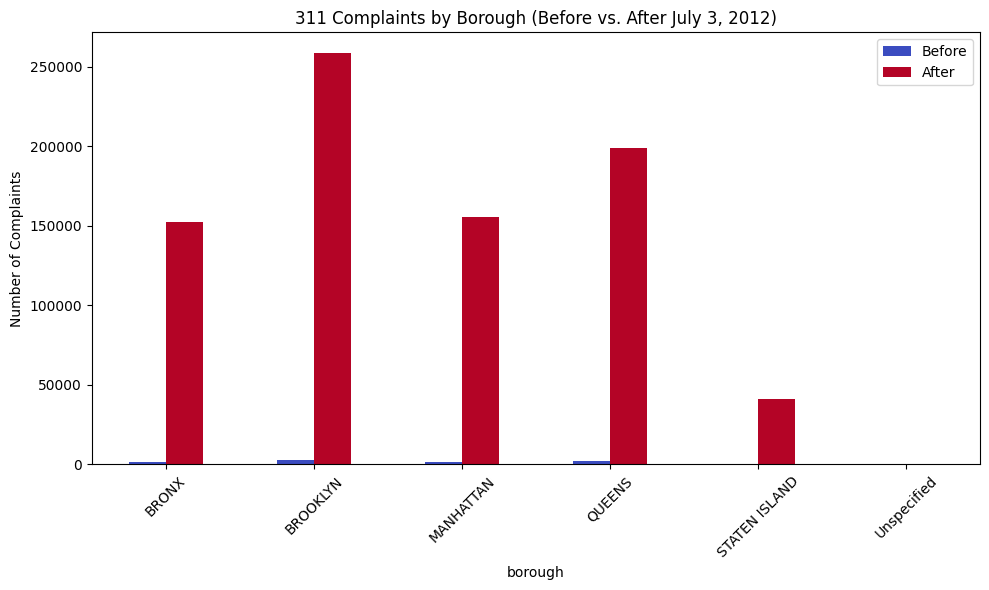

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Let's assume the incident date is July 3, 2012
split_date = pd.to_datetime("2012-07-03")

before = data[data['created_date'] < split_date]
after = data[data['created_date'] >= split_date]

# Complaints by borough
before_borough = before['borough'].value_counts().sort_index()
after_borough = after['borough'].value_counts().sort_index()

# Combine into one DataFrame for easy plotting
borough_counts = pd.DataFrame({
    'Before': before_borough,
    'After': after_borough
})
borough_counts.plot(kind='bar', figsize=(10,6), colormap='coolwarm', title='311 Complaints by Borough (Before vs. After July 3, 2012)')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


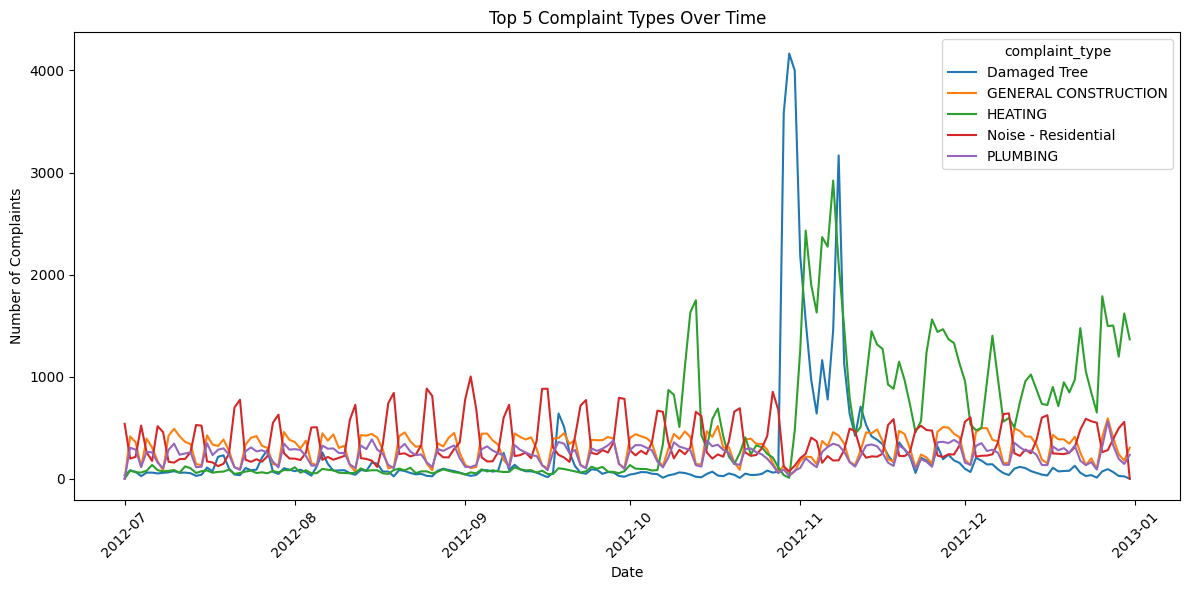

In [ ]:
# Extract just the date (not time)
data['date_only'] = data['created_date'].dt.date

# Top 5 complaint types
top5 = data['complaint_type'].value_counts().nlargest(5).index
top5_data = data[data['complaint_type'].isin(top5)]

# Group by date and complaint type
complaints_over_time = top5_data.groupby(['date_only', 'complaint_type']).size().unstack().fillna(0)

# Plot
complaints_over_time.plot(figsize=(12,6), title='Top 5 Complaint Types Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-28-421921146.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=agency_complaints_sum.index, x=agency_complaints_sum.values, palette="mako")


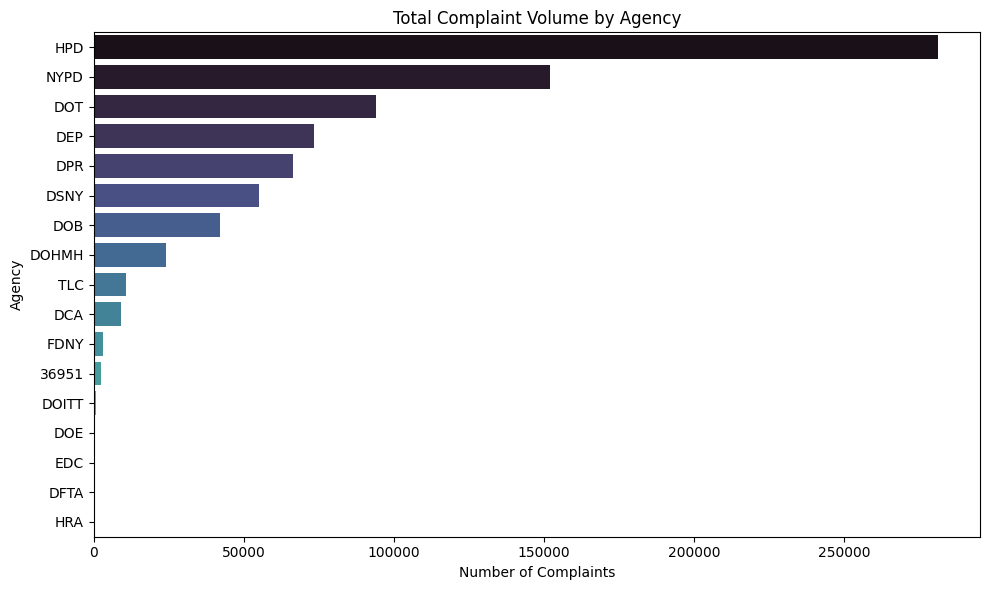

In [ ]:
# Group by agency and complaint_type
agency_complaints = data.groupby(['agency', 'complaint_type']).size().unstack(fill_value=0)

# Total volume by agency
agency_complaints_sum = agency_complaints.sum(axis=1).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(y=agency_complaints_sum.index, x=agency_complaints_sum.values, palette="mako")
plt.title("Total Complaint Volume by Agency")
plt.xlabel("Number of Complaints")
plt.ylabel("Agency")
plt.tight_layout()
plt.show()


/tmp/ipython-input-29-2044282324.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_complaints.index, x=top_complaints.values, palette='viridis')


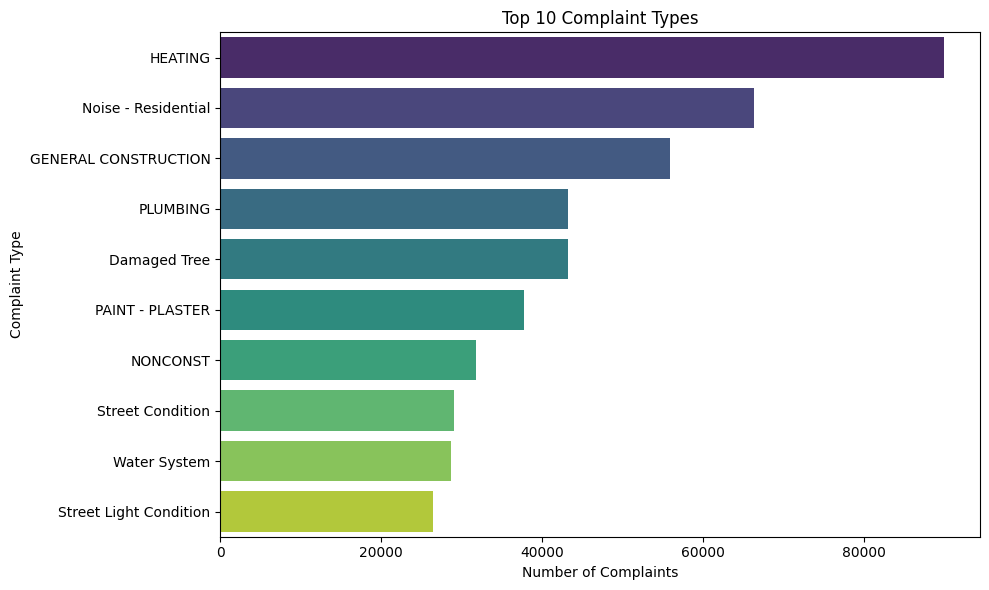

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 complaint types
top_complaints = data['complaint_type'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_complaints.index, x=top_complaints.values, palette='viridis')
plt.title('Top 10 Complaint Types')
plt.xlabel('Number of Complaints')
plt.ylabel('Complaint Type')
plt.tight_layout()
plt.show()


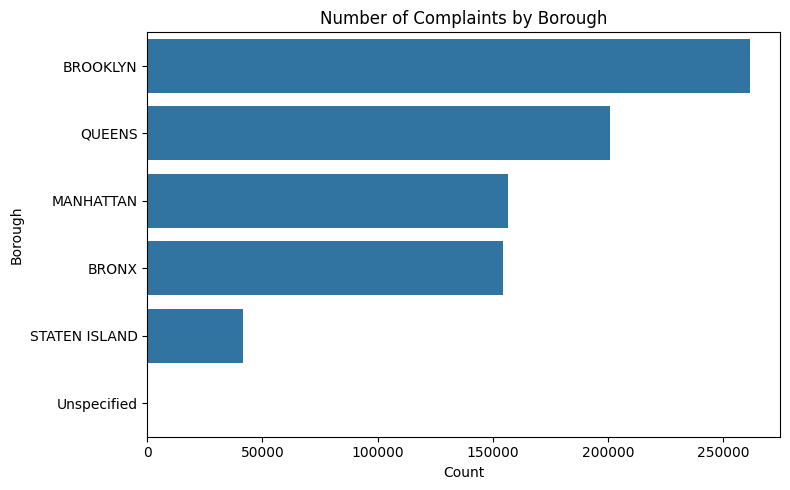

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, y='borough', order=data['borough'].value_counts().index)
plt.title('Number of Complaints by Borough')
plt.xlabel('Count')
plt.ylabel('Borough')
plt.tight_layout()
plt.show()
